In [75]:
from jupyterthemes import jtplot
jtplot.style()

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import string
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

from mlxtend.plotting import plot_decision_regions
from scikitplot.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/meerkats/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_table('data/SMSSpamCollection',
                    sep = '\t',
                    header = None,
                    names = ['label', 'sms_message'])
df.head(10)

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [4]:
df['length'] = df['sms_message'].map(lambda x: len(x))
df.head()

,label,sms_message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


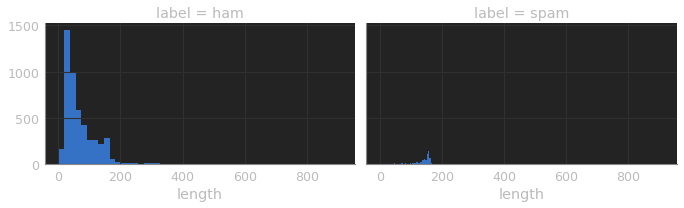

In [5]:
g = sns.FacetGrid(df, col='label', aspect=1.6)
g.map(plt.hist, "length", bins=50)

In [6]:
df = df.replace(['ham','spam'],[0,1])
df.head()

,label,sms_message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
def remove_stopwords(msg):
    translation = str.maketrans('','',string.punctuation)
    msg = msg.translate(translation)
    msg = [word for word in msg.split() if word.lower() not in stopwords.words('english')]
    return " ".join(msg)

In [8]:
df['sms_message'] = df['sms_message'].apply(remove_stopwords)
df.head()

,label,sms_message,length
0,0,Go jurong point crazy Available bugis n great ...,111
1,0,Ok lar Joking wif u oni,29
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,0,U dun say early hor U c already say,49
4,0,Nah dont think goes usf lives around though,61


In [9]:
msg = pd.DataFrame(df['sms_message'])
lbl = pd.DataFrame(df['label'])

In [10]:
counts = Counter()
for i in range(len(msg)):
    for word in msg.values[i][0].split(" "):
        counts[word] += 1

In [11]:
dict(counts)

{'Go': 14,
 'jurong': 1,
 'point': 12,
 'crazy': 12,
 'Available': 3,
 'bugis': 6,
 'n': 140,
 'great': 86,
 'world': 20,
 'la': 7,
 'e': 73,
 'buffet': 2,
 'Cine': 1,
 'got': 206,
 'amore': 1,
 'wat': 68,
 'Ok': 147,
 'lar': 38,
 'Joking': 1,
 'wif': 26,
 'u': 786,
 'oni': 4,
 'Free': 46,
 'entry': 25,
 '2': 482,
 'wkly': 10,
 'comp': 11,
 'win': 40,
 'FA': 4,
 'Cup': 3,
 'final': 13,
 'tkts': 4,
 '21st': 3,
 'May': 19,
 '2005': 3,
 'Text': 43,
 '87121': 4,
 'receive': 35,
 'questionstd': 2,
 'txt': 77,
 'rateTCs': 2,
 'apply': 29,
 '08452810075over18s': 2,
 'U': 346,
 'dun': 46,
 'say': 84,
 'early': 32,
 'hor': 2,
 'c': 46,
 'already': 87,
 'Nah': 10,
 'dont': 223,
 'think': 118,
 'goes': 26,
 'usf': 10,
 'lives': 4,
 'around': 60,
 'though': 25,
 'FreeMsg': 9,
 'Hey': 96,
 'darling': 4,
 '3': 66,
 'weeks': 19,
 'word': 34,
 'back': 141,
 'Id': 9,
 'like': 232,
 'fun': 30,
 'still': 138,
 'Tb': 1,
 'ok': 119,
 'XxX': 2,
 'std': 9,
 'chgs': 1,
 'send': 153,
 '£150': 27,
 'rcv': 2,
 '

In [12]:
vocabulary = sorted(counts, key = counts.get, reverse = True)
vocabulary

['u',
 '2',
 'call',
 'U',
 'get',
 'Im',
 'ur',
 '4',
 'ltgt',
 'know',
 'go',
 'like',
 'dont',
 'come',
 'got',
 'time',
 'day',
 'want',
 'Ill',
 'lor',
 'Call',
 'home',
 'send',
 'one',
 'going',
 'need',
 'Ok',
 'good',
 'love',
 'back',
 'n',
 'still',
 'text',
 'im',
 'later',
 'see',
 'da',
 'ok',
 'think',
 'ü',
 'free',
 'FREE',
 'r',
 'today',
 'Sorry',
 'week',
 'phone',
 'mobile',
 'cant',
 'tell',
 'take',
 'much',
 'night',
 'way',
 'Hey',
 'reply',
 'work',
 'give',
 'make',
 'new',
 'number',
 'already',
 'great',
 'right',
 'ask',
 'Hi',
 'say',
 'amp',
 'tomorrow',
 '1',
 'well',
 'said',
 'claim',
 'txt',
 'Oh',
 'Good',
 'message',
 'didnt',
 'Txt',
 'e',
 'prize',
 'meet',
 'really',
 'stop',
 'ill',
 'wat',
 'Pls',
 'msg',
 'would',
 'contact',
 '3',
 'Please',
 'find',
 'miss',
 'morning',
 'pick',
 'life',
 'STOP',
 'every',
 'sure',
 'sent',
 'Dont',
 'something',
 'Ur',
 'anything',
 'care',
 'around',
 'Yes',
 'buy',
 'please',
 'next',
 'us',
 'place',
 '

In [13]:
vsize = len(vocabulary)
idx = {}
for i, word in enumerate(vocabulary):
    idx[word] = i
    
idx

{'u': 0,
 '2': 1,
 'call': 2,
 'U': 3,
 'get': 4,
 'Im': 5,
 'ur': 6,
 '4': 7,
 'ltgt': 8,
 'know': 9,
 'go': 10,
 'like': 11,
 'dont': 12,
 'come': 13,
 'got': 14,
 'time': 15,
 'day': 16,
 'want': 17,
 'Ill': 18,
 'lor': 19,
 'Call': 20,
 'home': 21,
 'send': 22,
 'one': 23,
 'going': 24,
 'need': 25,
 'Ok': 26,
 'good': 27,
 'love': 28,
 'back': 29,
 'n': 30,
 'still': 31,
 'text': 32,
 'im': 33,
 'later': 34,
 'see': 35,
 'da': 36,
 'ok': 37,
 'think': 38,
 'ü': 39,
 'free': 40,
 'FREE': 41,
 'r': 42,
 'today': 43,
 'Sorry': 44,
 'week': 45,
 'phone': 46,
 'mobile': 47,
 'cant': 48,
 'tell': 49,
 'take': 50,
 'much': 51,
 'night': 52,
 'way': 53,
 'Hey': 54,
 'reply': 55,
 'work': 56,
 'give': 57,
 'make': 58,
 'new': 59,
 'number': 60,
 'already': 61,
 'great': 62,
 'right': 63,
 'ask': 64,
 'Hi': 65,
 'say': 66,
 'amp': 67,
 'tomorrow': 68,
 '1': 69,
 'well': 70,
 'said': 71,
 'claim': 72,
 'txt': 73,
 'Oh': 74,
 'Good': 75,
 'message': 76,
 'didnt': 77,
 'Txt': 78,
 'e': 79,
 'p

In [14]:
def conv_to_vec(msg):
    wrd_vec = np.zeros(vsize)
    for word in msg.split(" "):
        if idx.get(word) is None:
            continue
        else:
            wrd_vec[idx.get(word)] += 1
    return np.array(wrd_vec)

In [15]:
wrd_vec = np.zeros((len(msg), len(vocabulary)), dtype=np.int_)
for i, (_,msg_) in enumerate(msg.iterrows()):
    wrd_vec[i] = conv_to_vec(msg_[0])
    
wrd_vec[55:60]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
wrd_vec.shape

(5572, 11426)

In [17]:
df.head()

,label,sms_message,length
0,0,Go jurong point crazy Available bugis n great ...,111
1,0,Ok lar Joking wif u oni,29
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,0,U dun say early hor U c already say,49
4,0,Nah dont think goes usf lives around though,61


In [18]:
v = TfidfVectorizer()
vectors = v.fit_transform(df['sms_message'])
vectors.shape

(5572, 9437)

In [19]:
X, y = vectors, df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42
                                                   )

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(4179, 9437)
(1393, 9437)
(4179,)
(1393,)


In [58]:
def fit_model(model, X = X_train, y = y_train):
    model.fit(X, y)
    
def predict(model, X = X_test):
    y_pred = model.predict(X_test)
    return y_pred
    
def calc_score(y_pred):
    plot_confusion_matrix(y_test, y_pred, normalize=False)
    print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
    print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
    print("F1 Score = {}".format(f1_score(y_test, y_pred, average = 'macro')))
    print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))

Logistic Regression

Precision = 0.9608624154942444
Recall = 0.8370526765908544
F1 Score = 0.8857787116281453
Accuracy = 0.9540559942569993


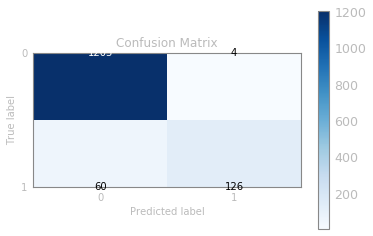

In [60]:
lgmodel = LogisticRegression()
fit_model(model = lgmodel)
y_pred = predict(model = lgmodel)
calc_score(y_pred)

In [77]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=lgmodel,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


/home/meerkats/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 369 out of 384 | elapsed:   43.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   56.1s finished
/home/meerkats/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [78]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.9879982145127009
Best Params:  {'C': 100, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l2', 'solver': 'saga'}


Precision = 0.978172083767649
Recall = 0.9495416521901809
F1 Score = 0.963228213700787
Accuracy = 0.9834888729361091


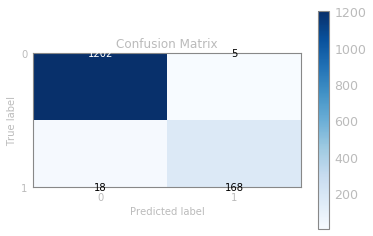

In [81]:
lgmodel = LogisticRegression(class_weight= {1: 0.7, 0: 0.3}, penalty = 'l2', solver = 'saga', C = 100)
fit_model(model = lgmodel)
y_pred = predict(model = lgmodel)
calc_score(y_pred)

Multinomial Naive Bayes Classifier

Precision = 0.9523988005997002
Recall = 0.6586021505376344
F1 Score = 0.7158261651768145
Accuracy = 0.908829863603733


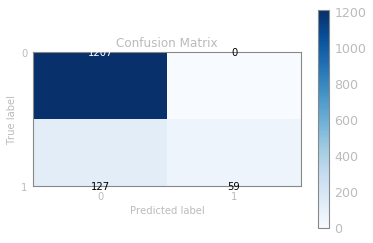

In [64]:
knc = KNeighborsClassifier()
fit_model(model = knc)
y_pred = predict(model = knc)
calc_score(y_pred)

Support Vector Classifier

/home/meerkats/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Precision = 0.43323761665470206
Recall = 0.5
F1 Score = 0.4642307692307692
Accuracy = 0.8664752333094041


/home/meerkats/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/meerkats/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


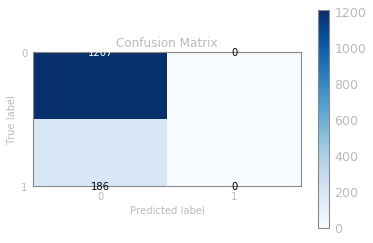

In [65]:
svc = SVC(kernel = 'sigmoid')
fit_model(model = svc)
y_pred = predict(model = svc)
calc_score(y_pred)

Decision Tree Classifier

Precision = 0.9256653750873405
Recall = 0.9178916000748323
F1 Score = 0.9217260941489553
Accuracy = 0.9641062455132807


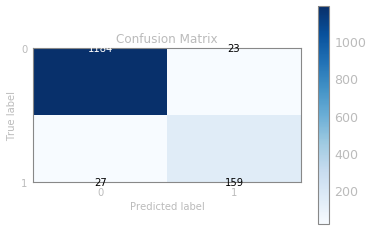

In [66]:
dtree = DecisionTreeClassifier()
fit_model(model = dtree)
y_pred = predict(model = dtree)
calc_score(y_pred)

Random Forest Classifier

/home/meerkats/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision = 0.9805472750898112
Recall = 0.8920588680724448
F1 Score = 0.9300813247001587
Accuracy = 0.9705671213208902


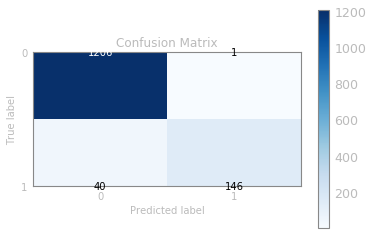

In [67]:
rf = RandomForestClassifier()
fit_model(model = rf)
y_pred = predict(model = rf)
calc_score(y_pred)

XGBoost Regressor with round off results

Precision = 0.9512281197063805
Recall = 0.8986690541732367
F1 Score = 0.9226415607095553
Accuracy = 0.9662598707824839


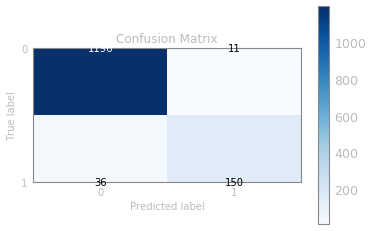

In [72]:
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'max_depth': 10,
    'eval_metric': 'error'
}

regressor = xgb.XGBRegressor(**params)
fit_model(model = regressor)
y_pred = predict(model = regressor)
roundoff = np.vectorize(round)
round_preds = roundoff(y_pred)
calc_score(round_preds)

XGBoost Classifier

Precision = 0.9512281197063805
Recall = 0.8986690541732367
F1 Score = 0.9226415607095553
Accuracy = 0.9662598707824839


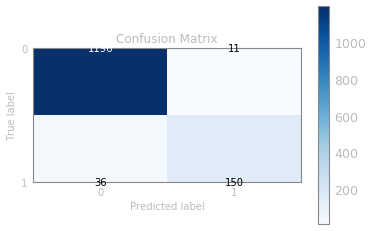

In [73]:
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'max_depth': 10,
    'eval_metric': 'error'
}

clf = xgb.XGBClassifier(**params)
fit_model(model = clf)
y_pred = predict(model = clf)
calc_score(y_pred)